In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
car = pd.read_csv("C:\\Users\\justu\\Downloads\\archive (2)\\car data.csv")
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car.shape

(301, 9)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
print(car.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [9]:
# Data preprocessing
# Convert categorical variables into dummy/indicator variables
car = pd.get_dummies(car, columns=['Fuel_Type', 'Selling_type', 'Transmission'])

In [10]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,False,True,True,False,False,True
1,sx4,2013,4.75,9.54,43000,0,False,True,False,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,False,True,True,False,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,False,True,True,False,False,True
4,swift,2014,4.60,6.87,42450,0,False,True,False,True,False,False,True


### Split the dataset into features and target variable

In [11]:
X = car.drop('Selling_Price', axis=1)
y = car['Selling_Price']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,Car_Name,Year,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
184,Bajaj Pulsar 150,2008,0.750,26000,1,False,False,True,False,True,False,True
132,Bajaj Avenger 220,2017,0.950,3500,0,False,False,True,False,True,False,True
194,Hero CBZ Xtreme,2008,0.787,50000,0,False,False,True,False,True,False,True
75,etios g,2015,6.800,36000,0,False,False,True,True,False,False,True
111,Royal Enfield Thunder 350,2016,1.500,8700,0,False,False,True,False,True,False,True


In [14]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
car['Car_Name_LabelEncoded'] = label_encoder.fit_transform(car['Car_Name'])

# Now you can use the 'Car_Name_LabelEncoded' column in your model training

In [15]:
# Include the 'Car_Name_LabelEncoded' column in your feature sets
X_train['Car_Name_LabelEncoded'] = car.loc[X_train.index, 'Car_Name_LabelEncoded']
X_test['Car_Name_LabelEncoded'] = car.loc[X_test.index, 'Car_Name_LabelEncoded']

In [16]:
X_train.head()

,Car_Name,Year,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Car_Name_LabelEncoded
184,Bajaj Pulsar 150,2008,0.750,26000,1,False,False,True,False,True,False,True,14
132,Bajaj Avenger 220,2017,0.950,3500,0,False,False,True,False,True,False,True,6
194,Hero CBZ Xtreme,2008,0.787,50000,0,False,False,True,False,True,False,True,18
75,etios g,2015,6.800,36000,0,False,False,True,True,False,False,True,78
111,Royal Enfield Thunder 350,2016,1.500,8700,0,False,False,True,False,True,False,True,48


In [17]:
X_train.drop(['Car_Name'], axis=1, inplace=True)

In [18]:
X_test.drop(['Car_Name'], axis=1, inplace=True)

In [19]:
X_train.head()

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Car_Name_LabelEncoded
184,2008,0.750,26000,1,False,False,True,False,True,False,True,14
132,2017,0.950,3500,0,False,False,True,False,True,False,True,6
194,2008,0.787,50000,0,False,False,True,False,True,False,True,18
75,2015,6.800,36000,0,False,False,True,True,False,False,True,78
111,2016,1.500,8700,0,False,False,True,False,True,False,True,48


In [20]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions
y_pred = model.predict(X_test)

In [22]:
y_pred

array([ 2.95879328,  8.18966173,  6.43471085, -1.38288876,  9.09993902,
        7.43421343,  1.31522131,  0.79973531,  1.36993578,  7.49587594,
        9.09306488,  0.56705284,  8.43319392,  3.4688389 ,  6.88063857,
        3.02717459,  0.46788587, 10.71724136,  1.74096942,  2.30870595,
        0.39840474,  8.13431348,  6.60762249,  2.64089429,  0.81387422,
        3.68423382,  5.25864927,  2.82426912,  2.11336786,  1.72731569,
        0.41877921,  9.13287939, -0.61721084,  2.27282183,  8.57349165,
        4.50868315,  7.21254937,  7.55363024,  2.85992775,  7.95075922,
        3.9328789 ,  4.29049775,  4.35100821,  0.57219194,  7.32262512,
        0.47079446,  7.30314145, 11.24683633,  3.12882752,  5.37808946,
        6.77617588,  2.15647395, 20.63788026, 16.99616904,  7.48273988,
        9.70756729,  4.46643596,  8.98803819,  1.84454575,  7.58889083,
        0.22303835])

In [23]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.482684251439877


In [24]:
import seaborn as sns

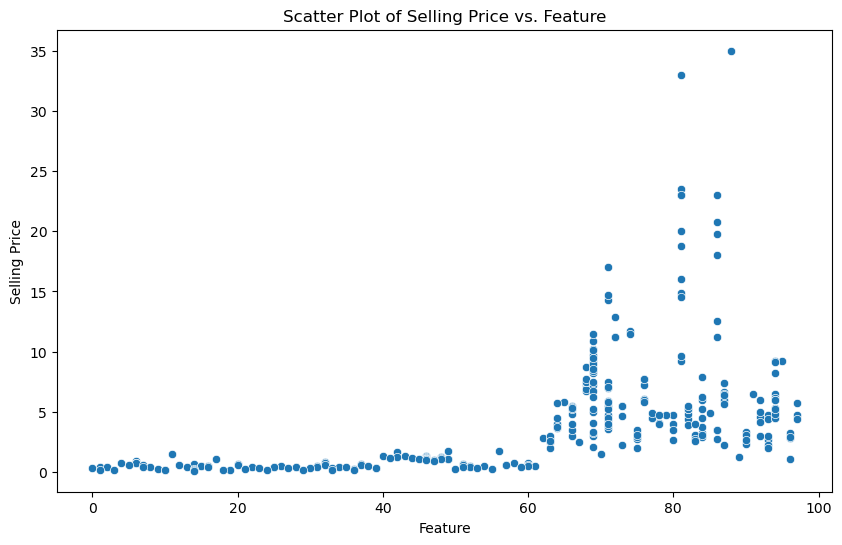

In [25]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car_Name_LabelEncoded', y='Selling_Price', data=car)
plt.title('Scatter Plot of Selling Price vs. Feature')
plt.xlabel('Feature')
plt.ylabel('Selling Price')
plt.show()

C:\Users\justu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


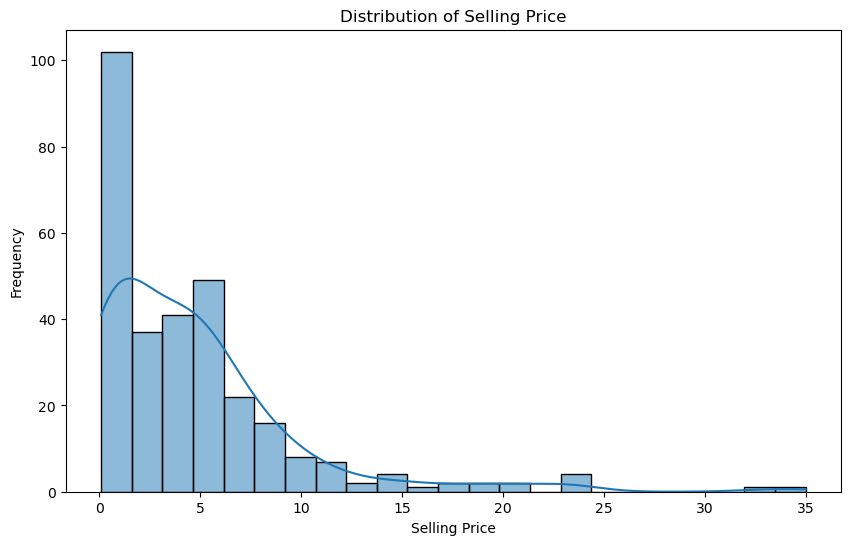

In [26]:
# Histogram or Density plot
plt.figure(figsize=(10, 6))
sns.histplot(car['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

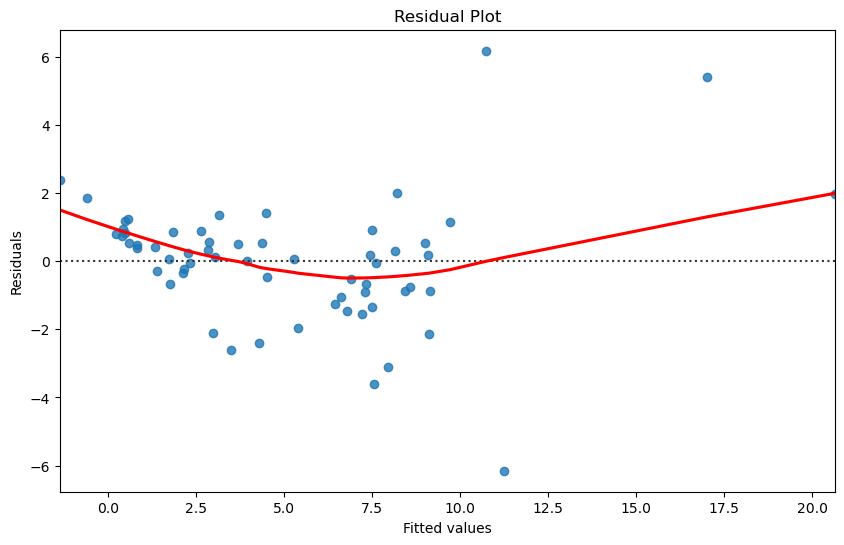

In [27]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

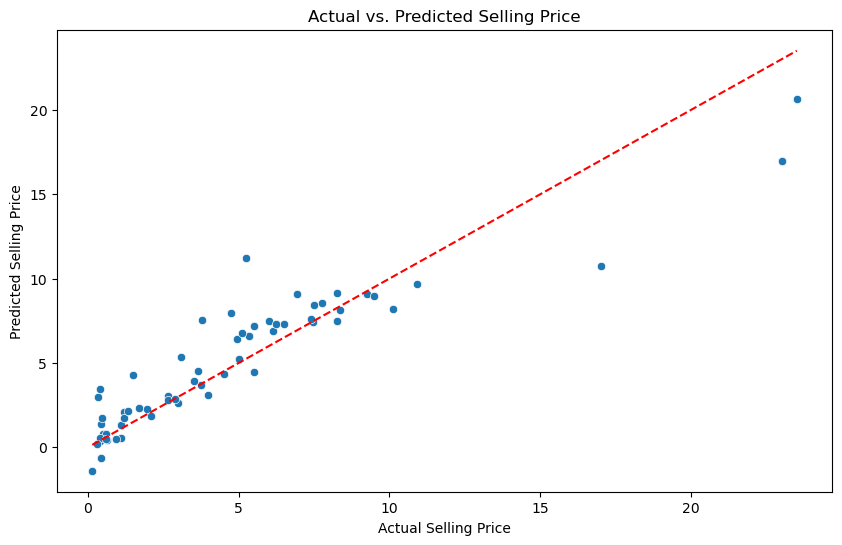

In [28]:
# Actual vs. Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs. Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()